In [1]:
"import numpy as np", 
import pandas as pd
import matplotlib.pyplot as plt
import re

In [2]:
def std_col_name(name):
	name = name.strip()
	name = re.sub(r"\s+", "_", name)
	name = re.sub(r"[^$/\w]", "", name)
	return name.lower()

std_col_name("  PATRIMONIO /#$&% ATIVOS  ")

'patrimonio_/$_ativos'

- [ x ] Dar pontos positivos ou negativos para cada coluna da empresa
- [ x ] Rankear ações pela melhor pontuação geral
- [ ] Rankear FIIs da mesm forma
- [ ] Avaliar historicamente se investir ns top 15 desse ranking traz bons resultados
- [ ] Adicionar metricas historicas (evolucao de preco, distribuicao de dividendos, etc)
- [ ] Adicionar modelo Black & Scholes
- [ ] Adicionar fontes de dados independentes do Status Invest
- [ ] Adicionar metadados (setor da acao, vantagem competiiva, gestao boa, etc)
- [ ] !!!! Adicionar método que faz top 20 de cada coluna e dá 1 ponto pra cada carcterística TOP


In [3]:
br_stocks = pd.read_csv("acoes_brasil.csv", sep=";", decimal=",", thousands='.') #, index_col="TICKER") #.fillna(0)
stocks_col_names = [std_col_name(name) for name in br_stocks.columns]
br_stocks.columns = stocks_col_names

br_stocks[["dy"]] = br_stocks[["dy"]].fillna(0)

print(br_stocks.columns)
print(br_stocks.dtypes)
br_stocks.head()

Index(['ticker', 'preco', 'dy', 'p/l', 'p/vp', 'p/ativos', 'margem_bruta',
       'margem_ebit', 'marg_liquida', 'p/ebit', 'ev/ebit',
       'divida_liquida_/_ebit', 'div_liq_/_patri', 'psr', 'p/cap_giro',
       'p_at_cir_liq', 'liq_corrente', 'roe', 'roa', 'roic',
       'patrimonio_/_ativos', 'passivos_/_ativos', 'giro_ativos',
       'cagr_receitas_5_anos', 'cagr_lucros_5_anos', 'liquidez_media_diaria',
       'vpa', 'lpa', 'peg_ratio', 'valor_de_mercado'],
      dtype='object')
ticker                    object
preco                    float64
dy                       float64
p/l                      float64
p/vp                     float64
p/ativos                 float64
margem_bruta             float64
margem_ebit              float64
marg_liquida             float64
p/ebit                   float64
ev/ebit                  float64
divida_liquida_/_ebit    float64
div_liq_/_patri          float64
psr                      float64
p/cap_giro               float64
p_at_cir_liq     

,ticker,preco,dy,p/l,p/vp,p/ativos,margem_bruta,margem_ebit,marg_liquida,p/ebit,...,patrimonio_/_ativos,passivos_/_ativos,giro_ativos,cagr_receitas_5_anos,cagr_lucros_5_anos,liquidez_media_diaria,vpa,lpa,peg_ratio,valor_de_mercado
0,AALR3,9.31,0.00,-4.18,1.08,0.40,30.10,1.60,-22.81,59.53,...,0.37,0.62,0.42,0.13,NaN,1.337609e+06,8.58,-2.22,-0.04,1.101306e+09
1,ABCB4,24.46,6.45,5.98,1.01,0.10,25.50,17.06,15.50,5.43,...,0.10,0.91,0.11,18.70,17.80,1.602660e+07,24.15,4.09,-0.32,5.795457e+09
2,ABEV3,12.24,5.97,12.79,2.14,1.40,50.30,22.59,18.29,10.35,...,0.65,0.34,0.60,10.72,15.72,3.898716e+08,5.73,0.96,0.84,1.928269e+11
3,ADHM3,1.56,0.00,-4.09,-1.29,105.12,100.00,-13548.48,-18860.61,-5.69,...,-81.72,82.72,0.14,NaN,NaN,NaN,-1.21,-0.38,-0.58,2.543977e+07
4,AERI3,0.63,0.00,-7.15,0.96,0.20,12.62,9.03,-3.39,2.69,...,0.21,0.79,0.84,NaN,NaN,1.713713e+06,0.66,-0.09,-0.03,7.827145e+08


In [4]:
def percentage_str_to_float(x):
	x = str(x)
	# print("el: '", x, "'")
	x = re.sub(r"^\s*$", "N/A", x)
	x = x.strip("%").replace(",", ".")
	if x == "N/A":
		return None
	return float(x) / 100

# https://www.fundsexplorer.com.br/ranking
fiis_df = pd.read_csv("fiis.csv", sep="\t", decimal=",", thousands=".")

fiis_col_names = fiis_df.columns
fiis_col_names = [std_col_name(name) for name in fiis_col_names]

fiis_df.columns = fiis_col_names

fiis_df.rename(columns={"dividend_yield": "dy", "fundos": "ticker"}, inplace = True)
fiis_df[["dy"]] = fiis_df[["dy"]].fillna(0)

percentage_cols = ["dy", "dy_3m_acumulado", "dy_6m_acumulado", "dy_12m_acumulado", "dy_3m_média", "dy_6m_média", "dy_12m_média", "dy_ano", "variação_preço", "rentab_período", "rentab_acumulada", "dy_patrimonial", "variação_patrimonial", "rentab_patr_período"]
for col in percentage_cols:
	fiis_df[col] = fiis_df[col].apply(percentage_str_to_float)
	# print(col, fiis_df[col].dtype)
	# fiis_df[col] = fiis_df[col].apply(percentage_str_to_float)

print(fiis_df.columns)
print(fiis_df.dtypes)
fiis_df.head()

Index(['ticker', 'setor', 'preço_atual_r$', 'liquidez_diária_r$', 'p/vp',
       'último_dividendo', 'dy', 'dy_3m_acumulado', 'dy_6m_acumulado',
       'dy_12m_acumulado', 'dy_3m_média', 'dy_6m_média', 'dy_12m_média',
       'dy_ano', 'variação_preço', 'rentab_período', 'rentab_acumulada',
       'patrimônio_líquido', 'vpa', 'p/vpa', 'dy_patrimonial',
       'variação_patrimonial', 'rentab_patr_período', 'rentab_patr_acumulada',
       'quant_ativos', 'volatilidade', 'num_cotistas', 'tax_gestão',
       'tax_performance', 'tax_administração'],
      dtype='object')
ticker                    object
setor                     object
preço_atual_r$           float64
liquidez_diária_r$       float64
p/vp                     float64
último_dividendo         float64
dy                       float64
dy_3m_acumulado          float64
dy_6m_acumulado          float64
dy_12m_acumulado         float64
dy_3m_média              float64
dy_6m_média              float64
dy_12m_média             float64

,ticker,setor,preço_atual_r$,liquidez_diária_r$,p/vp,último_dividendo,dy,dy_3m_acumulado,dy_6m_acumulado,dy_12m_acumulado,...,dy_patrimonial,variação_patrimonial,rentab_patr_período,rentab_patr_acumulada,quant_ativos,volatilidade,num_cotistas,tax_gestão,tax_performance,tax_administração
0,AAZQ11,Indefinido,9.18,717752.33,0.96,0.12,0.0131,0.0390,0.0785,0.1552,...,0.0125,0.0000,0.0000,"0,00 %",0,12.56,27598,NaN,NaN,NaN
1,ABCP11,Shoppings,71.70,64062.79,0.71,0.50,0.0064,0.0234,0.0500,0.0944,...,0.0049,0.1040,0.1095,"18,84 %",1,15.69,16751,NaN,NaN,NaN
2,AFHI11,Papéis,97.25,1377696.26,1.01,0.95,0.0096,0.0289,0.0598,0.1257,...,0.0099,0.0154,0.0254,"8,97 %",0,8.05,32625,NaN,NaN,NaN
3,AGRX11,Outros,9.45,431149.49,NaN,0.11,0.0105,0.0348,0.0761,0.1614,...,NaN,NaN,NaN,NaN,0,14.98,0,NaN,NaN,NaN
4,AIEC11,Lajes Corporativas,52.29,408605.59,0.62,0.71,0.0135,0.0307,0.0811,0.1503,...,0.0084,-0.1003,-0.0927,"-8,22 %",4,16.99,17213,NaN,NaN,NaN


In [5]:
points_df = pd.DataFrame()

feature_to_green_flag_filter = {
	"p/l": {"min_val": 3, "max_val": 20},
	"dy": {"min_val": 5, "max_val": 20},
	"p/vp": {"min_val": 0.5, "max_val": 3},
	"margem_bruta": {"min_val": 5, "max_val": 100},
	"marg_liquida": {"min_val": 5, "max_val": 100},
	"roa": {"min_val": 5, "max_val": 100},
	"roe": {"min_val": 5, "max_val": 100},
	"roic": {"min_val": 5, "max_val": 100},
}

filtered_br_stocks = br_stocks
for feature_name, filter_info in feature_to_green_flag_filter.items():
	# step 1
	min_val = filter_info["min_val"]
	min_filter = (filtered_br_stocks[feature_name] > min_val)

	filtered_step_1 = filtered_br_stocks[min_filter]

	# step 2
	max_val = filter_info["max_val"]
	max_filter = (filtered_step_1[feature_name] < max_val)

	filtered_step_2 = filtered_step_1[max_filter]

	# end
	filtered_br_stocks = filtered_step_2

filtered_br_stocks.head()

,ticker,preco,dy,p/l,p/vp,p/ativos,margem_bruta,margem_ebit,marg_liquida,p/ebit,...,patrimonio_/_ativos,passivos_/_ativos,giro_ativos,cagr_receitas_5_anos,cagr_lucros_5_anos,liquidez_media_diaria,vpa,lpa,peg_ratio,valor_de_mercado
2,ABEV3,12.24,5.97,12.79,2.14,1.40,50.30,22.59,18.29,10.35,...,0.65,0.34,0.60,10.72,15.72,3.898716e+08,5.73,0.96,0.84,1.928269e+11
7,AGRO3,24.88,12.91,9.96,1.16,0.73,30.65,20.17,20.86,10.30,...,0.63,0.37,0.35,27.22,15.22,7.201077e+06,21.40,2.50,-0.23,2.554764e+09
133,CEBR3,21.29,12.45,7.88,1.47,1.05,42.78,84.57,67.30,6.27,...,0.71,0.11,0.20,-34.71,8.36,1.004016e+05,14.50,2.70,-26.68,1.533178e+09
134,CEBR5,19.40,13.67,7.18,1.34,0.96,42.78,84.57,67.30,5.71,...,0.71,0.11,0.20,-34.71,8.36,1.117845e+05,14.50,2.70,-24.31,1.533178e+09
135,CEBR6,21.25,13.73,7.86,1.47,1.05,42.78,84.57,67.30,6.26,...,0.71,0.11,0.20,-34.71,8.36,1.428879e+05,14.50,2.70,-26.63,1.533178e+09


In [6]:
def generate_point_col(stock_df, col_name): #, min_val, max_val):
	col_series = stock_df[col_name]

	# mean_val = col_series.mean()
	# std_dev = col_series.std()
	median_val = col_series.median()
	first_quarter = col_series.quantile(0.25)
	third_quarter = col_series.quantile(0.75)

	quarter_dist = third_quarter - first_quarter

	std_foo = (lambda x : abs(x[col_name] - median_val) / quarter_dist)
	ascending_std_foo = (lambda x : -std_foo(x))

	std_vals_series = stock_df.apply(ascending_std_foo, axis=1)
	lowest_val = std_vals_series.min()

	def calculate_points(x):
		standardized_val = std_foo(x)

		is_low_outlier = standardized_val <= first_quarter - 1.5 * quarter_dist
		is_high_outlier = standardized_val >= third_quarter + 1.5 * quarter_dist
		if is_low_outlier or is_high_outlier:
			standardized_val = -lowest_val # crazy negative ops, dont ask why

		return -standardized_val

	point_col_name = "generic_point_" + col_name

	col_df = col_series.to_frame()
	col_df[point_col_name] = col_df.apply(calculate_points, axis=1)
	col_df["ticker"] = stock_df["ticker"]

	return col_df[[point_col_name]]  # [["ticker", point_col_name]]

	# filtered_df = col_df[ (col_df > min_val) & (col_df < max_val) ].sort_values(by=col_name).head(50)
	# top_tickers = set(filtered_df["ticker"].unique())
	# print(top_tickers)
	
	# return col_df.apply(lambda x : 2 if x["ticker"] in top_tickers else 0, axis=1)


In [7]:
def generate_point_col_with_rank(stock_df, feature_name, filter_dict, red_flag_filters):
	# col_series = stock_df[col_name]

	# feature_name = filter_dict[0]
	min_val = filter_dict["min_val"]
	max_val = filter_dict["max_val"]
	the_bigger_the_better = filter_dict["the_bigger_the_better"]

	lower_tolerable_limit = red_flag_filters["lower_tolerable_limit"]
	upper_tolerable_limit = red_flag_filters["upper_tolerable_limit"]
	# the_bigger_the_better_red_flag = red_flag_filters["the_bigger_the_better"]
	
	should_order_ascending = not the_bigger_the_better

	# green points
	filters_green_flag = ((stock_df[feature_name] >= min_val) & (stock_df[feature_name] <= max_val))
	filtered_green_stock_df = stock_df[filters_green_flag].sort_values(by=feature_name, ascending=should_order_ascending).head(25)
	filtered_green_flag_stock_names = set(filtered_green_stock_df["ticker"])

	calculate_green_points = (lambda x : 1 if x["ticker"] in filtered_green_flag_stock_names else 0)
	green_point_col_name = "green_point_" + feature_name
	stock_df[green_point_col_name] = stock_df.apply(calculate_green_points, axis=1)

	# red points
	filters_red_flag = ((stock_df[feature_name] > upper_tolerable_limit) | (stock_df[feature_name] < lower_tolerable_limit))
	filtered_red_stock_df = stock_df[filters_red_flag]
	filtered_red_flag_stock_names = set(filtered_red_stock_df["ticker"])

	calculate_red_points = (lambda x : -1 if x["ticker"] in filtered_red_flag_stock_names else 0)
	red_point_col_name = "red_point_" + feature_name
	stock_df[red_point_col_name] = stock_df.apply(calculate_red_points, axis=1)


	return stock_df[[green_point_col_name, red_point_col_name]]


In [8]:
filter_green_flag_tuples = (
	("p/l", 3, 20, False),
	("dy", 0.05, 0.2, True),
	("p/vp", 0.5, 3, False),
	("margem_bruta", 50, 100, True),
	("marg_liquida", 5, 100, True),
	("margem_ebit", 20, 100, True),
	("roa", 5, 100, True),
	("roe", 5, 100, True),
	("roic", 5, 100, True),
	("liquidez_diária_r$", 10 ** 5, 10 ** 12, True),
	("dy_12m_acumulado", 0.05, 0.2, True),
	# ("dy_12m_média", 5 / 12, 20 / 12, True),
	("quant_ativos", 4, 1000, True),
	("num_cotistas", 1000, 10 ** 9, True),
	("num_cotistas", 1000, 10 ** 9, True)
)

# p/ativos                 float64
# margem_ebit              float64
# p/ebit                   float64
# ev/ebit                  float64
# divida_liquida_/_ebit    float64
# div_liq_/_patri          float64
# psr                      float64
# p/cap_giro               float64
# p_at_cir_liq             float64
# liq_corrente             float64
# patrimonio_/_ativos      float64
# passivos_/_ativos        float64
# giro_ativos              float64
# cagr_receitas_5_anos     float64
# cagr_lucros_5_anos       float64
# liquidez_media_diaria    float64
# vpa                      float64
# lpa                      float64
# peg_ratio                float64
# valor_de_mercado         float64

feature_to_green_flag_filter = {}

for filter_tuple in filter_green_flag_tuples:
	feature_name, min_val, max_val, the_bigger_the_better = filter_tuple

	feature_to_green_flag_filter[feature_name] = {
		"min_val": min_val,
		"max_val": max_val,
		"the_bigger_the_better": the_bigger_the_better
	}

In [9]:
filter_red_flag_tuples = (
	("p/l", 1, 30, False),
	("dy", -0.001, 0.25, True),
	("p/vp", 0.4, 1.5, False), # just for fiis
	("margem_bruta", 49, 101, True),
	("marg_liquida", 4, 101, True),
	("margem_ebit", 19, 101, True),
	("roa", 4, 101, True),
	("roe", 4, 101, True),
	("roic", 4, 101, True),
	("liquidez_diária_r$", 5 * 10 ** 4, 10 ** 13, True),
	("dy_12m_acumulado", 0.04, 0.21, True),
	("dy_12m_média", 0.04 / 12, 0.21 / 12, True), # redundant
	("quant_ativos", 0, 10 ** 10, True),
	("num_cotistas", 999, 10 ** 10, True)
)

feature_to_red_flag_filter = {}

for filter_tuple in filter_red_flag_tuples:
	feature_name, lower_tolerable_limit, upper_tolerable_limit, the_bigger_the_better = filter_tuple

	feature_to_red_flag_filter[feature_name] = {
		"lower_tolerable_limit": lower_tolerable_limit,
		"upper_tolerable_limit": upper_tolerable_limit,
		"the_bigger_the_better": the_bigger_the_better
	}

In [10]:
points_df = pd.DataFrame()

br_stocks_col_names = set(br_stocks.columns)
feature_names_that_have_green_filter = set(feature_to_green_flag_filter.keys())
feature_names_that_have_red_filter = set(feature_to_red_flag_filter.keys())

filtered_br_stocks = br_stocks
for feature_name, filter_info in feature_to_green_flag_filter.items():
	if feature_name not in br_stocks_col_names or feature_name not in feature_names_that_have_green_filter:
		continue

	# step 1
	min_val = filter_info["min_val"]
	min_filter = (filtered_br_stocks[feature_name] > min_val)

	filtered_step_1 = filtered_br_stocks[min_filter]

	# step 2
	max_val = filter_info["max_val"]
	max_filter = (filtered_step_1[feature_name] < max_val)

	filtered_step_2 = filtered_step_1[max_filter]

	# end
	filtered_br_stocks = filtered_step_2

filtered_br_stocks.head(5)

,ticker,preco,dy,p/l,p/vp,p/ativos,margem_bruta,margem_ebit,marg_liquida,p/ebit,...,patrimonio_/_ativos,passivos_/_ativos,giro_ativos,cagr_receitas_5_anos,cagr_lucros_5_anos,liquidez_media_diaria,vpa,lpa,peg_ratio,valor_de_mercado


In [11]:
feature_col_names = br_stocks.columns[2:]  # exclude tickers and price
df_points = pd.DataFrame()
df_points_generic = pd.DataFrame()

br_stocks_col_names = set(br_stocks.columns)

print("br_stocks_col_names ", br_stocks_col_names)
print("feature_names_that_have_green_filter ", feature_names_that_have_green_filter)
print("feature_names_that_have_red_filter ", feature_names_that_have_red_filter)
print("ticker in set ? ", ("ticker" in br_stocks_col_names))
print("dy in set ? ", ("dy" in br_stocks_col_names))

# filtered_br_stocks = br_stocks
for col_name in feature_col_names:
	col_not_in_stocks = (col_name not in br_stocks_col_names)
	col_not_in_filters = (col_name not in feature_names_that_have_green_filter)
	col_not_in_red_filters = (col_name not in feature_names_that_have_red_filter)

	# print("col_name: ", col_name)
	# print("feature_not_in_stocks: ", col_not_in_stocks)
	# print("feature_not_in_filters: ", col_not_in_filters)
	# df_points["point_" + col_name] = generate_point_col(br_stocks, col_name) 

	if col_not_in_stocks or col_not_in_filters or col_not_in_red_filters:
		continue

	filter_dict = feature_to_green_flag_filter[col_name]
	red_flag_filters = feature_to_red_flag_filter[col_name]

	df_points_generic[["generic_point_" + col_name]] = generate_point_col(br_stocks, col_name)
	df_points[["green_point_" + col_name, "red_point_" + col_name]] = generate_point_col_with_rank(br_stocks, col_name, filter_dict, red_flag_filters) 
	# .sort_values(by="point_p/l", ascending=False).head(25)
df_points["ticker"] = br_stocks["ticker"]
# print(df_points.iloc[:, 0:-2])
# print(sum(df_points.iloc[:, 0:-2]))
df_points["total_points"] = df_points.iloc[:, 0:-1].sum(axis=1) # sum all float cols
df_points_generic["total_generic_points"] = df_points_generic.iloc[:, 0:-1].sum(axis=1) # sum all float cols

df_all_points = pd.merge(df_points, df_points_generic, left_index=True, right_index=True, suffixes=[None, "_deleteme"])
df_all_points = pd.merge(df_all_points, br_stocks, left_index=True, right_index=True, suffixes=[None, "_deleteme"])

df_all_points["p/l"] = br_stocks["p/l"]
df_all_points["dy"] = br_stocks["dy"]

stocks_rank = df_all_points.sort_values(by=["total_points", "dy", "total_generic_points"], ascending=False)

stocks_rank.head(20) # [["ticker", "dy", "p/l", "point_dy", "point_p/l", "total_points"]]
stocks_rank.head(20)[["ticker", "dy", "p/l", "total_points", "total_generic_points"]]

br_stocks_col_names  {'lpa', 'p/ebit', 'psr', 'p/ativos', 'divida_liquida_/_ebit', 'margem_bruta', 'cagr_lucros_5_anos', 'preco', 'ev/ebit', 'roic', 'patrimonio_/_ativos', 'roe', 'liq_corrente', 'p/cap_giro', 'giro_ativos', 'vpa', 'ticker', 'p_at_cir_liq', 'valor_de_mercado', 'margem_ebit', 'p/l', 'marg_liquida', 'p/vp', 'div_liq_/_patri', 'passivos_/_ativos', 'roa', 'liquidez_media_diaria', 'dy', 'cagr_receitas_5_anos', 'peg_ratio'}
feature_names_that_have_green_filter  {'margem_ebit', 'p/l', 'margem_bruta', 'quant_ativos', 'marg_liquida', 'roic', 'p/vp', 'roe', 'roa', 'num_cotistas', 'dy', 'liquidez_diária_r$', 'dy_12m_acumulado'}
feature_names_that_have_red_filter  {'margem_ebit', 'p/l', 'margem_bruta', 'quant_ativos', 'marg_liquida', 'roic', 'p/vp', 'roe', 'roa', 'num_cotistas', 'dy_12m_média', 'dy', 'liquidez_diária_r$', 'dy_12m_acumulado'}
ticker in set ?  True
dy in set ?  True


,ticker,dy,p/l,total_points,total_generic_points
582,TRPN3,0.00,0.44,4,-23.920888
224,EEEL3,0.00,3.62,3,-9.976058
281,G2DI33,0.00,3.24,3,-11.049340
271,FIGE3,0.33,3.15,2,-9.893241
568,TIET11,0.00,4.38,2,-9.971624
225,EEEL4,0.00,5.04,2,-10.347185
89,BRAP4,14.81,3.78,1,-7.848535
88,BRAP3,13.85,3.67,1,-7.608391
391,MOAR3,4.01,5.49,1,-7.534884
411,MULT3,3.49,15.63,1,-10.683986


In [12]:
br_stocks.describe()

,preco,dy,p/l,p/vp,p/ativos,margem_bruta,margem_ebit,marg_liquida,p/ebit,ev/ebit,...,green_point_margem_ebit,red_point_margem_ebit,green_point_marg_liquida,red_point_marg_liquida,green_point_roe,red_point_roe,green_point_roa,red_point_roa,green_point_roic,red_point_roic
count,620.000000,620.000000,620.000000,620.000000,620.000000,589.000000,589.000000,589.000000,620.000000,613.000000,...,620.000000,620.000000,620.000000,620.000000,620.000000,620.00000,620.000000,620.000000,620.000000,620.000000
mean,54.012194,7.956903,79.099452,263.121016,13.677871,-16.447963,-16.963718,31.639813,-71.823935,-63.724111,...,0.040323,-0.656452,0.040323,-0.412903,0.040323,-0.43871,0.040323,-0.590323,0.040323,-0.325806
std,493.527712,112.802800,1990.428542,6011.961474,244.227860,457.192739,1013.160717,1154.224129,1900.141818,1815.734461,...,0.196874,0.475276,0.196874,0.492753,0.196874,0.49663,0.196874,0.492171,0.196874,0.469054
min,0.000000,0.000000,-5164.910000,-421.030000,0.000000,-4173.020000,-18852.940000,-18860.610000,-46723.870000,-44454.250000,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.00000,0.000000,-1.000000,0.000000,-1.000000
25%,4.887500,0.000000,-0.082500,0.520000,0.150000,19.200000,3.340000,-0.350000,0.000000,1.680000,...,0.000000,-1.000000,0.000000,-1.000000,0.000000,-1.00000,0.000000,-1.000000,0.000000,-1.000000
50%,12.220000,0.000000,6.970000,1.130000,0.410000,31.580000,13.310000,6.950000,4.665000,6.970000,...,0.000000,-1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,-1.000000,0.000000,0.000000
75%,26.237500,3.587500,13.717500,2.060000,0.860000,46.790000,24.140000,17.660000,9.320000,12.800000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000
max,11091.730000,2762.620000,48754.690000,149535.600000,5953.080000,125.920000,6032.010000,13896.670000,3576.720000,3586.400000,...,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,1.000000,0.000000,1.000000,0.000000


In [41]:
import numpy as np

feature_col_names = fiis_df.columns[2:]  # exclude tickers and sector
df_points = pd.DataFrame()
df_points_generic = pd.DataFrame()

fiis_df_col_names = set(fiis_df.columns)

print("fiis_df_col_names ", fiis_df_col_names)
print("feature_names_that_have_green_filter ", feature_names_that_have_green_filter)
print("ticker in set ? ", ("ticker" in fiis_df_col_names))
print("dy in set ? ", ("dy" in fiis_df_col_names))

n = len(fiis_df)
green_points_series = pd.Series(np.zeros(n))
red_points_series = pd.Series(np.zeros(n))
# filtered_fiis_df = fiis_df
for col_name in feature_col_names:
	col_not_in_stocks = (col_name not in fiis_df_col_names)
	col_not_in_filters = (col_name not in feature_names_that_have_green_filter)
	col_not_in_red_filters = (col_name not in feature_names_that_have_red_filter)

	if col_not_in_stocks or col_not_in_filters or col_not_in_red_filters:
		continue

	filter_dict = feature_to_green_flag_filter[col_name]
	red_flag_filters = feature_to_red_flag_filter[col_name]

	df_points_generic[["generic_point_" + col_name]] = generate_point_col(fiis_df, col_name)
	df_points[["green_point_" + col_name, "red_point_" + col_name]] = generate_point_col_with_rank(fiis_df, col_name, filter_dict, red_flag_filters) 
	# .sort_values(by="point_p/l", ascending=False).head(25)
 
	green_points_series += df_points[f"green_point_{col_name}"]
	red_points_series += df_points[f"red_point_{col_name}"]

 
# print(fiis_df)
df_points["ticker"] = fiis_df["ticker"]
# print(df_points.iloc[:, 0:-2])
# print(sum(df_points.iloc[:, 0:-2]))
df_points["total_points"] = df_points.iloc[:, 0:-1].sum(axis=1) # sum all float cols
df_points_generic["total_generic_points"] = df_points_generic.iloc[:, 0:-1].sum(axis=1) # sum all float cols

df_points["dy"] = fiis_df["dy"]
df_points["dy_12m_acumulado"] = fiis_df["dy_12m_acumulado"]

df_all_points = pd.merge(df_points, fiis_df, left_index=True, right_index=True, suffixes=[None, "_deleteme"])
df_all_points = pd.merge(df_all_points, df_points_generic, left_index=True, right_index=True, suffixes=[None, "_deleteme"])

df_all_points["green_point_sum"] = green_points_series
df_all_points["red_point_sum"] = red_points_series

fiis_rank = df_all_points.sort_values(by=["red_point_sum", "green_point_sum", "total_points", "dy_12m_acumulado", "total_generic_points"], ascending=False)
fiis_rank = fiis_rank.reset_index()

fiis_rank_no_papers = fiis_rank[(fiis_rank["setor"] != "Papéis") & (fiis_rank["setor"] != "Misto") & (fiis_rank["setor"] != "Indefinido")]
fiis_rank_no_papers.head(40)[["ticker", "setor", "p/vp", "dy", "quant_ativos", "dy_12m_acumulado", "green_point_sum", "red_point_sum", "red_point_dy_12m_acumulado", "total_points", "total_generic_points"]]

fiis_df_col_names  {'dy_6m_média', 'red_point_dy', 'green_point_dy_12m_acumulado', 'num_cotistas', 'dy_12m_média', 'tax_performance', 'red_point_quant_ativos', 'rentab_acumulada', 'dy_ano', 'dy_3m_média', 'quant_ativos', 'red_point_liquidez_diária_r$', 'green_point_p/vp', 'green_point_quant_ativos', 'dy_6m_acumulado', 'último_dividendo', 'setor', 'liquidez_diária_r$', 'dy_12m_acumulado', 'rentab_patr_acumulada', 'green_point_num_cotistas', 'green_point_liquidez_diária_r$', 'preço_atual_r$', 'patrimônio_líquido', 'red_point_dy_12m_acumulado', 'volatilidade', 'vpa', 'dy_patrimonial', 'ticker', 'dy_3m_acumulado', 'variação_preço', 'tax_administração', 'red_point_num_cotistas', 'green_point_dy', 'rentab_período', 'p/vp', 'p/vpa', 'rentab_patr_período', 'dy', 'tax_gestão', 'red_point_p/vp', 'variação_patrimonial'}
feature_names_that_have_green_filter  {'margem_ebit', 'p/l', 'margem_bruta', 'quant_ativos', 'marg_liquida', 'roic', 'p/vp', 'roe', 'roa', 'num_cotistas', 'dy', 'liquidez_diária_r

,ticker,setor,p/vp,dy,quant_ativos,dy_12m_acumulado,green_point_sum,red_point_sum,red_point_dy_12m_acumulado,total_points,total_generic_points
0,VISC11,Shoppings,0.92,0.0082,25,0.0938,3.0,0.0,0,3,-7906.410693
1,BTLG11,Imóveis Industriais e Logísticos,1.01,0.0071,24,0.0893,3.0,0.0,0,3,-7910.061033
2,XPLG11,Imóveis Industriais e Logísticos,0.94,0.0071,20,0.0849,3.0,0.0,0,3,-7866.063850
3,HGLG11,Imóveis Industriais e Logísticos,1.04,0.0065,25,0.0833,3.0,0.0,0,3,-60.580695
4,HTMX11,Hotéis,1.29,0.0093,22,0.1881,2.0,0.0,0,2,-7885.337361
6,BBFI11B,Lajes Corporativas,0.56,0.0633,2,0.1391,2.0,0.0,0,2,-7877.872296
8,TGAR11,Fundo de Desenvolvimento,1.05,0.0104,9,0.1350,2.0,0.0,0,2,-43.558806
12,GARE11,Imóveis Industriais e Logísticos,0.98,0.0095,5,0.1101,2.0,0.0,0,2,-7860.564118
14,TRXF11,Imóveis Comerciais - Outros,1.01,0.0080,30,0.1040,2.0,0.0,0,2,-7904.106239
15,HSML11,Shoppings,0.99,0.0082,7,0.0967,2.0,0.0,0,2,-7862.183239


In [42]:
fiis_list_1 = ["BCFF11", "KNRI11", "HCTR11", "HABT11", "RECR11", "URPR11", "RZAT11", "HGLG11", "KISU11", "VGIP11", "BBGO11", "KNCR11"]
fiis_positions_1 = []

for fii_name in fiis_list_1:
	matching_ids = fiis_rank.index[fiis_rank["ticker"] == fii_name]
	fiis_positions_1.append(matching_ids[0])

new_sub_rank = fiis_rank.loc[fiis_positions_1]
new_sub_rank["rank_position"] = fiis_positions_1
new_sub_rank = new_sub_rank.sort_values(by="rank_position")

interesting_cols = ["rank_position", "ticker", "setor", "dy", "p/vp", "quant_ativos", "dy_12m_acumulado", "total_points", "green_point_sum", "red_point_sum", "red_point_liquidez_diária_r$", "red_point_num_cotistas"]
new_sub_rank[interesting_cols]

,rank_position,ticker,setor,dy,p/vp,quant_ativos,dy_12m_acumulado,total_points,green_point_sum,red_point_sum,red_point_liquidez_diária_r$,red_point_num_cotistas
3,3,HGLG11,Imóveis Industriais e Logísticos,0.0065,1.04,25,0.0833,3,3.0,0.0,0,0
9,9,KNCR11,Papéis,0.0092,1.03,0,0.1286,2,2.0,0.0,0,0
19,19,KNRI11,Misto,0.0060,1.03,19,0.0768,2,2.0,0.0,0,0
30,30,URPR11,Papéis,0.0117,0.84,0,0.1522,1,1.0,0.0,0,0
41,41,RECR11,Papéis,0.0104,0.93,1,0.1163,1,1.0,0.0,0,0
59,59,BCFF11,Fundo de Fundos,0.0083,0.91,1,0.0938,1,1.0,0.0,0,0
79,79,HABT11,Papéis,0.0117,0.95,0,0.1423,0,0.0,0.0,0,0
86,86,BBGO11,Indefinido,0.0105,0.89,0,0.1353,0,0.0,0.0,0,0
100,100,RZAT11,Imóveis Industriais e Logísticos,0.0108,0.98,11,0.1299,0,0.0,0.0,0,0
133,133,VGIP11,Papéis,0.0094,0.98,0,0.1148,0,0.0,0.0,0,0


In [43]:
fiis_list_2 = ["HGRU11", "VISC11", "HGLG11", "KNRI11", "TRXF11", "XPLG11", "HGCR11", "MXRF11", "KNCR11", "KISU11", "BCFF11", "JSAF11"]

fiis_positions_2 = []

for fii_name in fiis_list_2:
	matching_ids = fiis_rank.index[fiis_rank["ticker"] == fii_name]
	fiis_positions_2.append(matching_ids[0])

new_sub_rank = fiis_rank.loc[fiis_positions_2]
new_sub_rank["rank_position"] = fiis_positions_2
new_sub_rank = new_sub_rank.sort_values(by="rank_position")

interesting_cols = ["rank_position", "ticker", "setor", "dy", "p/vp", "quant_ativos", "dy_12m_acumulado", "total_points", "green_point_sum", "red_point_sum", "red_point_liquidez_diária_r$", "red_point_num_cotistas"]
new_sub_rank[interesting_cols]

,rank_position,ticker,setor,dy,p/vp,quant_ativos,dy_12m_acumulado,total_points,green_point_sum,red_point_sum,red_point_liquidez_diária_r$,red_point_num_cotistas
0,0,VISC11,Shoppings,0.0082,0.92,25,0.0938,3,3.0,0.0,0,0
2,2,XPLG11,Imóveis Industriais e Logísticos,0.0071,0.94,20,0.0849,3,3.0,0.0,0,0
3,3,HGLG11,Imóveis Industriais e Logísticos,0.0065,1.04,25,0.0833,3,3.0,0.0,0,0
9,9,KNCR11,Papéis,0.0092,1.03,0,0.1286,2,2.0,0.0,0,0
10,10,MXRF11,Papéis,0.0095,1.05,3,0.1241,2,2.0,0.0,0,0
14,14,TRXF11,Imóveis Comerciais - Outros,0.0080,1.01,30,0.1040,2,2.0,0.0,0,0
17,17,HGRU11,Misto,0.0062,1.06,69,0.0910,2,2.0,0.0,0,0
19,19,KNRI11,Misto,0.0060,1.03,19,0.0768,2,2.0,0.0,0,0
59,59,BCFF11,Fundo de Fundos,0.0083,0.91,1,0.0938,1,1.0,0.0,0,0
116,116,HGCR11,Papéis,0.0090,1.03,0,0.1209,0,0.0,0.0,0,0


In [15]:
fiis_list_2 = ["JSRE11", "HGRU11", "TRXF11", "JSAF11", "TRBL11", "XPML11", "MCCI11", "CVBI11", "KNIP11", "HGCR11", "MXRF11"]

fiis_positions_2 = []

for fii_name in fiis_list_2:
	matching_ids = fiis_rank.index[fiis_rank["ticker"] == fii_name]
	fiis_positions_2.append(matching_ids[0])

new_sub_rank = fiis_rank.loc[fiis_positions_2]
new_sub_rank["rank_position"] = fiis_positions_2
new_sub_rank = new_sub_rank.sort_values(by="rank_position")

interesting_cols = ["rank_position", "ticker", "setor", "dy", "p/vp", "quant_ativos", "dy_12m_acumulado", "total_points", "red_point_liquidez_diária_r$", "red_point_num_cotistas"]
new_sub_rank[interesting_cols]

,rank_position,ticker,setor,dy,p/vp,quant_ativos,dy_12m_acumulado,total_points,red_point_liquidez_diária_r$,red_point_num_cotistas
10,10,MXRF11,Papéis,0.0095,1.05,3,0.1241,2,0,0
14,14,TRXF11,Imóveis Comerciais - Outros,0.0080,1.01,30,0.1040,2,0,0
16,16,XPML11,Shoppings,0.0079,1.05,14,0.0929,2,0,0
17,17,HGRU11,Misto,0.0062,1.06,69,0.0910,2,0,0
55,55,KNIP11,Papéis,0.0107,0.99,0,0.0996,1,0,0
128,128,HGCR11,Papéis,0.0090,1.03,0,0.1209,0,0,0
131,131,CVBI11,Papéis,0.0112,1.00,0,0.1197,0,0,0
133,133,JSAF11,Fundo de Fundos,0.0097,1.01,0,0.1191,0,0,0
147,147,MCCI11,Papéis,0.0085,0.95,0,0.1140,0,0,0
186,186,TRBL11,Imóveis Industriais e Logísticos,0.0085,1.00,5,0.0957,0,0,0


In [16]:
# br_stocks.apply(lambda x : x[ x["p/l"] > 3 ].sort_values(by="p/l").head(20))
top_equity_df = br_stocks[ (br_stocks["p/l"] > 3) & (br_stocks["p/l"] < 20) ].sort_values(by="p/l").head(50)
top_equity_tickers = set(top_equity_df["ticker"].unique())
print(top_equity_tickers)
# print(top_equity_df)
br_stocks["point_1"] = br_stocks.apply(lambda x : 2 if x["ticker"] in top_equity_tickers else 0, axis=1)

top_dy_df = br_stocks[ (br_stocks["dy"] > 5) & (br_stocks["dy"] < 20) ]
top_dy_tickers = set(top_dy_df["ticker"].unique())
print(top_dy_tickers)
# print(top_dy_df)
br_stocks["point_2"] = br_stocks.apply(lambda x : 0.5 if x["ticker"] in top_dy_tickers else 0, axis=1)

top_pvp_df = br_stocks[ (br_stocks["p/vp"] > 0) & (br_stocks["p/vp"] < 2) ]
top_pvp_tickers = set(top_pvp_df["ticker"].unique())
print(top_pvp_tickers)
# print(top_pvp_df)
br_stocks["point_3"] = br_stocks.apply(lambda x : 1 if x["ticker"] in top_pvp_tickers else 0, axis=1)

top_net_margin_df = br_stocks[ (br_stocks["marg_liquida"] > 10) & (br_stocks["marg_liquida"] < 100) ]
top_net_margin_tickers = set(top_net_margin_df["ticker"].unique())
print(top_net_margin_tickers)
# print(top_net_margin_df)
br_stocks["point_4"] = br_stocks.apply(lambda x : 1 if x["ticker"] in top_net_margin_tickers else 0, axis=1)

top_gross_margin_df = br_stocks[ (br_stocks["margem_bruta"] > 10) & (br_stocks["margem_bruta"] < 100) ]
top_gross_margin_tickers = set(top_gross_margin_df["ticker"].unique())
print(top_gross_margin_tickers)
# print(top_gross_margin_df)
br_stocks["point_4"] = br_stocks.apply(lambda x : 1 if x["ticker"] in top_gross_margin_tickers else 0, axis=1)

br_stocks["point_sum"] = sum([br_stocks["point_%d" % i] for i in range(1, 5)])

{'CMIG3', 'NEMO5', 'BOBR4', 'EPAR3', 'NEOE3', 'HBTS5', 'BAZA3', 'NAFG4', 'CLSC4', 'ALOS3', 'EEEL3', 'BBAS3', 'CTKA3', 'SUZB3', 'GGBR3', 'CESP3', 'MEAL3', 'FIGE3', 'BRAP4', 'CMIG4', 'CEDO3', 'BRAP3', 'GGBR4', 'EEEL4', 'COCE5', 'NTCO3', 'CTKA4', 'EUCA4', 'BNBR3', 'SAPR4', 'CESP6', 'GOAU3', 'HAGA3', 'SAPR11', 'CEDO4', 'MTSA4', 'ROMI3', 'PETR4', 'MOAR3', 'RDNI3', 'CESP5', 'TIET11', 'SAPR3', 'PETR3', 'GOAU4', 'G2DI33', 'RANI3', 'CAMB4', 'CLSC3', 'JALL3'}
{'CMIG3', 'VULC3', 'CXSE3', 'HBTS5', 'CRPG3', 'BBAS3', 'TRPL3', 'EGIE3', 'UNIP6', 'UNIP5', 'CEEB3', 'JHSF3', 'SOJA3', 'ALUP11', 'BRAP3', 'ALLD3', 'CBAV3', 'BEEF3', 'CEBR3', 'ALUP4', 'SANB11', 'GOAU3', 'POMO3', 'CGRA4', 'BEES3', 'LAVV3', 'CRPG6', 'PETR3', 'RANI3', 'ENMA3B', 'TAEE11', 'AGRO3', 'SOND3', 'BMKS3', 'TAEE4', 'UNIP3', 'BRSR3', 'EVEN3', 'BBSE3', 'CMIG4', 'CATA3', 'CSMG3', 'GGBR4', 'ATOM3', 'RAPT3', 'WHRL4', 'EKTR4', 'MERC4', 'RAIZ4', 'POMO4', 'WHRL3', 'REDE3', 'CEBR5', 'GOAU4', 'MTRE3', 'CPFE3', 'ITSA4', 'ITUB4', 'BRBI11', 'NEOE3', 

{'CMIG3', 'ENGI4', 'VSTE3', 'ALOS3', 'RAPT4', 'CRPG3', 'TIMS3', 'RRRP3', 'PPAR3', 'ALUP11', 'CPLE11', 'ALLD3', 'CBAV3', 'PETZ3', 'MGLU3', 'BEES3', 'CRPG6', 'IFCM3', 'MOSI3', 'AGRO3', 'ECPR3', 'MLAS3', 'CPRE3', 'SUZB3', 'RECV3', 'CATA3', 'COGN3', 'LUPA3', 'TELB3', 'AALR3', 'OPCT3', 'PTNT4', 'EZTC3', 'NGRD3', 'EUCA3', 'ITSA4', 'VIVT4', 'LCAM3', 'NEOE3', 'BAZA3', 'SANB3', 'ABCB4', 'MODL4', 'VLID3', 'IGTA3', 'CRFB3', 'CASH3', 'FIQE3', 'CPLE3', 'MSPA3', 'VITT3', 'SPRI5', 'ALUP3', 'TRIS3', 'ELET3', 'PINE4', 'EPAR3', 'SHOW3', 'RNEW3', 'PTNT3', 'MRSA6B', 'SULA3', 'ENEV3', 'EQTL3', 'TRPL4', 'EALT3', 'BLAU3', 'CRIV4', 'CESP6', 'FIEI3', 'CYRE3', 'TELB4', 'ESPA3', 'PEAB4', 'MRVE3', 'MBLY3', 'ENJU3', 'BRGE6', 'APTI3', 'HBTS5', 'DASA3', 'CEEB3', 'SOJA3', 'BRAP3', 'COCE5', 'MTSA3', 'GOAU3', 'CESP5', 'CSAN3', 'PETR3', 'LOGG3', 'ALPA4', 'BHIA3', 'CAMB4', 'SRNA3', 'MNDL3', 'NEMO5', 'GUAR3', 'KRSA3', 'RANI4', 'TAEE4', 'NAFG4', 'BRSR3', 'BMIN4', 'RPAD5', 'CBEE3', 'CTSA3', 'SCAR3', 'BLUT4', 'PATI3', 'NTCO3

In [17]:
br_stocks.sort_values(by="point_sum", ascending=False).head(22)

,ticker,preco,dy,p/l,p/vp,p/ativos,margem_bruta,margem_ebit,marg_liquida,p/ebit,...,red_point_roe,green_point_roa,red_point_roa,green_point_roic,red_point_roic,point_1,point_2,point_3,point_4,point_sum
310,HBTS5,41.00,7.07,3.51,0.65,0.26,85.98,163.47,144.77,3.11,...,0,0,0,0,0,2,0.5,1,1,4.5
290,GGBR4,22.72,6.65,4.91,0.79,0.52,17.50,16.69,11.27,3.31,...,0,0,0,0,0,2,0.5,1,1,4.5
159,CMIG4,12.87,6.20,4.24,1.16,0.50,24.73,21.11,18.52,3.72,...,0,0,0,0,0,2,0.5,1,1,4.5
420,NEOE3,20.58,8.44,4.81,0.85,0.26,26.13,21.96,11.89,2.60,...,0,0,0,0,0,2,0.5,1,1,4.5
336,JALL3,7.47,5.93,3.60,1.14,0.35,30.06,49.30,33.06,2.41,...,0,0,0,0,0,2,0.5,1,1,4.5
448,PETR3,39.15,18.72,3.73,1.32,0.50,51.08,38.69,25.53,2.46,...,0,0,0,0,0,2,0.5,1,1,4.5
449,PETR4,38.26,19.20,3.65,1.29,0.49,51.08,38.69,25.53,2.40,...,0,0,0,0,0,2,0.5,1,1,4.5
46,BAZA3,102.32,5.21,4.80,0.99,0.13,26.11,45.99,30.61,3.20,...,0,0,-1,0,0,2,0.5,1,1,4.5
158,CMIG3,14.85,5.37,4.89,1.34,0.58,24.73,21.11,18.52,4.29,...,0,0,0,0,0,2,0.5,1,1,4.5
47,BBAS3,57.00,8.17,4.91,0.99,0.07,32.66,15.94,12.40,3.81,...,0,0,-1,0,0,2,0.5,1,1,4.5


['normalised_dy', 'normalised_p/l', 'normalised_p/vp', 'normalised_marg_liquida', 'normalised_margem_bruta']


<Axes: >

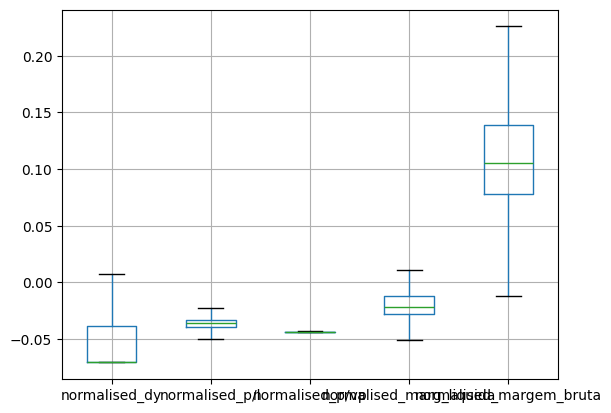

In [18]:
desired_cols = ["dy", "p/l", "p/vp", "marg_liquida", "margem_bruta"]
modified_cols = []

for col in desired_cols:
    new_col = "normalised_" + col
    modified_cols.append(new_col)
    
    col_vals = br_stocks[col]
    # print(col_vals, col_vals.mean(), col_vals.std())
    br_stocks[new_col] = ( col_vals - col_vals.mean() ) / col_vals.std()   

print(modified_cols)
# print(br_stocks)
br_stocks.boxplot(column=modified_cols, showfliers=False)

/home/apf2000/Documents/data-analysis/status_invest/brazil_stocks_data_scraper.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  all_stocks_df = pd.concat([all_stocks_df, stock_df], ignore_index=True, copy=False)


     ticker    param_name  year    value
0     bbse3            dy  2024   8.6544
1     bbse3            dy  2023  10.3602
2     bbse3            dy  2022   5.8324
3     bbse3            dy  2021   4.8048
4     bbse3            dy  2020   9.4030
...     ...           ...   ...      ...
1375  cple6  lucros_cagr5  2012      NaN
1376  cple6  lucros_cagr5  2011      NaN
1377  cple6  lucros_cagr5  2010      NaN
1378  cple6  lucros_cagr5  2009      NaN
1379  cple6  lucros_cagr5  2008      NaN

[1380 rows x 4 columns]


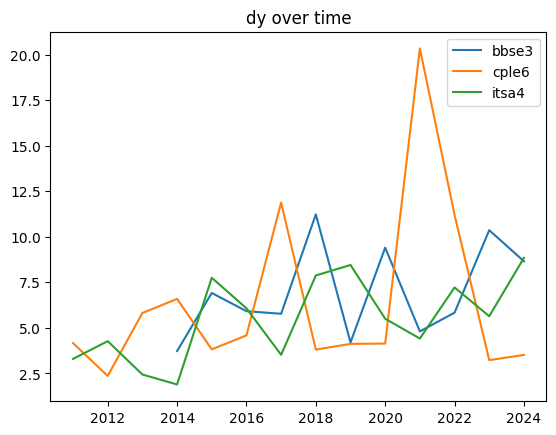

In [19]:
from brazil_stocks_data_scraper import StatusInvestScraper, AssetDataPlotter

scraper = StatusInvestScraper()
all_stocks_df = scraper.get_all_available_data()
print(all_stocks_df)

plotter = AssetDataPlotter(all_stocks_df)
plotter.plot("dy")